In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.axis import RegularAxis
#from pyinverse.grid import RegularGrid
from pyinverse.rect import srect_2D_proj_ramp

In [3]:
Na = 201
Np = 1001

In [4]:
#axis_x = RegularAxis.linspace(-1, 1, Nx)
#axis_y = RegularAxis.linspace(-1, 1, Ny)
axis_t = RegularAxis.linspace(-3, 3, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [5]:
#grid = RegularGrid(axis_x, axis_y)
#grid_y = RegularGrid(axis_theta, axis_t)

In [6]:
theta_rad = np.pi / 9

In [7]:
p_ramp = srect_2D_proj_ramp([theta_rad], axis_t.centers, 1, 1).flatten()
np.mean(p_ramp)

0.005665817605773178

<IPython.core.display.Javascript object>


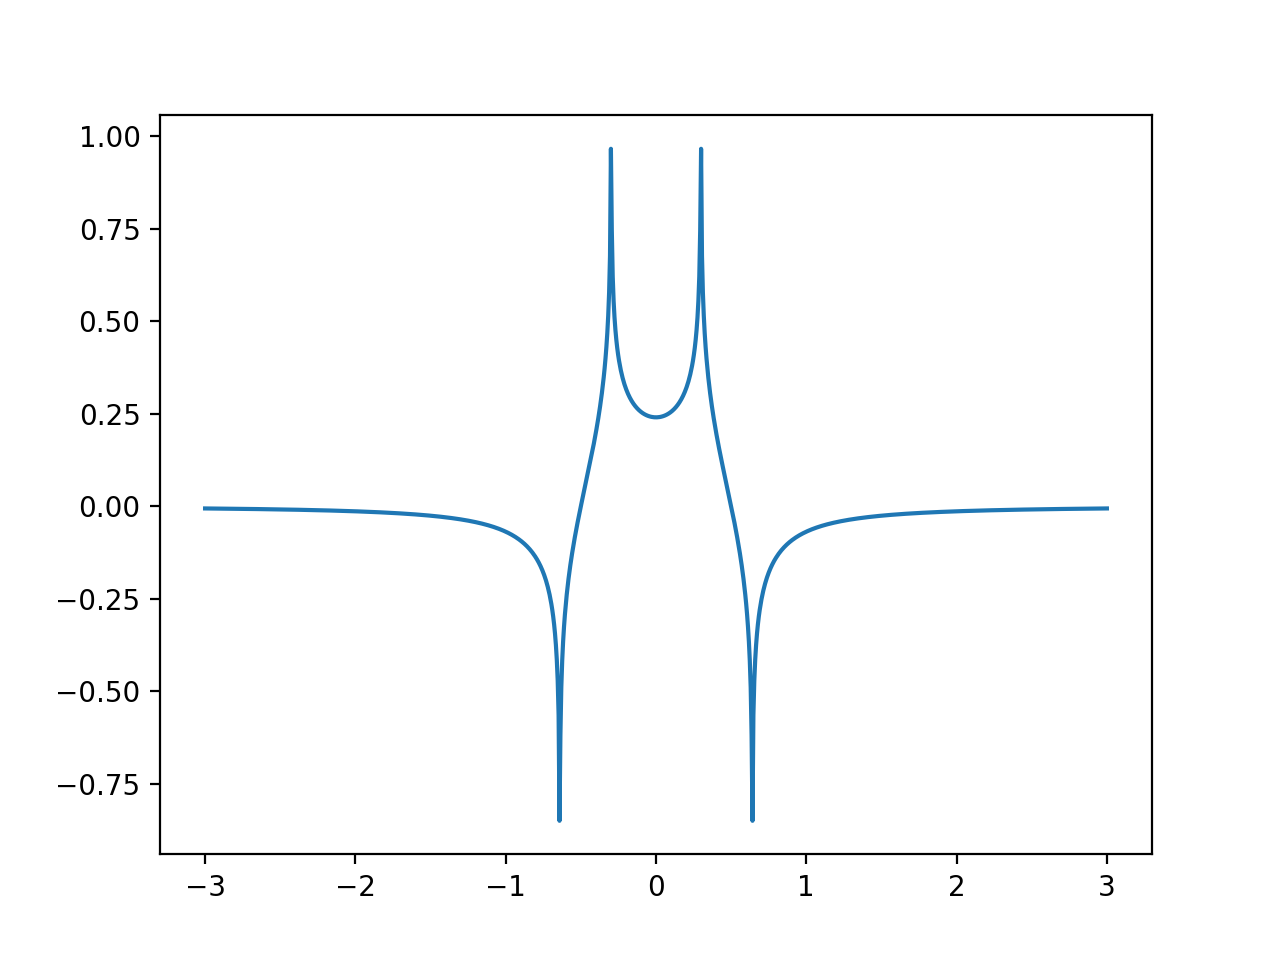

In [8]:
fig, ax = plt.subplots()
ax.plot(axis_t.centers, p_ramp);

In [9]:
axis_omega_t, P_ramp_fft = axis_t.spectrum(p_ramp, real=True)

In [10]:
assert np.allclose(np.imag(P_ramp_fft), 0)
P_ramp_fft = np.real(P_ramp_fft)
P_ramp_fft[0]

0.03402890054027371

In [11]:
upsilon_Hz = axis_omega_t.Hz().centers
P_ramp = np.abs(upsilon_Hz) * np.sinc(upsilon_Hz * np.cos(theta_rad)) * np.sinc(upsilon_Hz * np.sin(theta_rad))

<IPython.core.display.Javascript object>


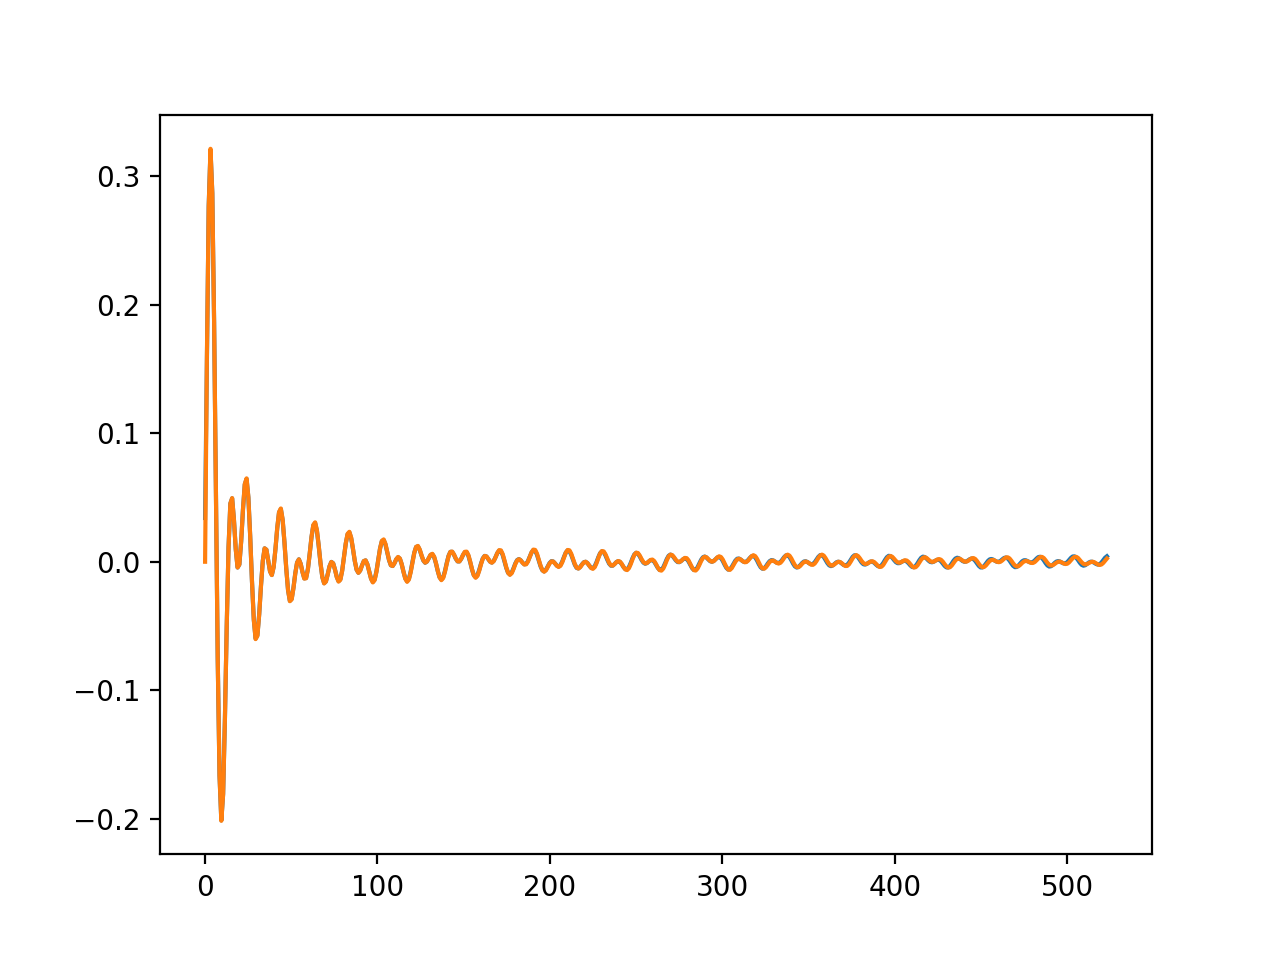

In [12]:
fig, ax = plt.subplots()
ax.plot(axis_omega_t.centers, P_ramp_fft)
ax.plot(axis_omega_t.centers, P_ramp)

In [13]:
_, p_ramp_ifft = axis_omega_t.ispectrum(P_ramp)

<IPython.core.display.Javascript object>


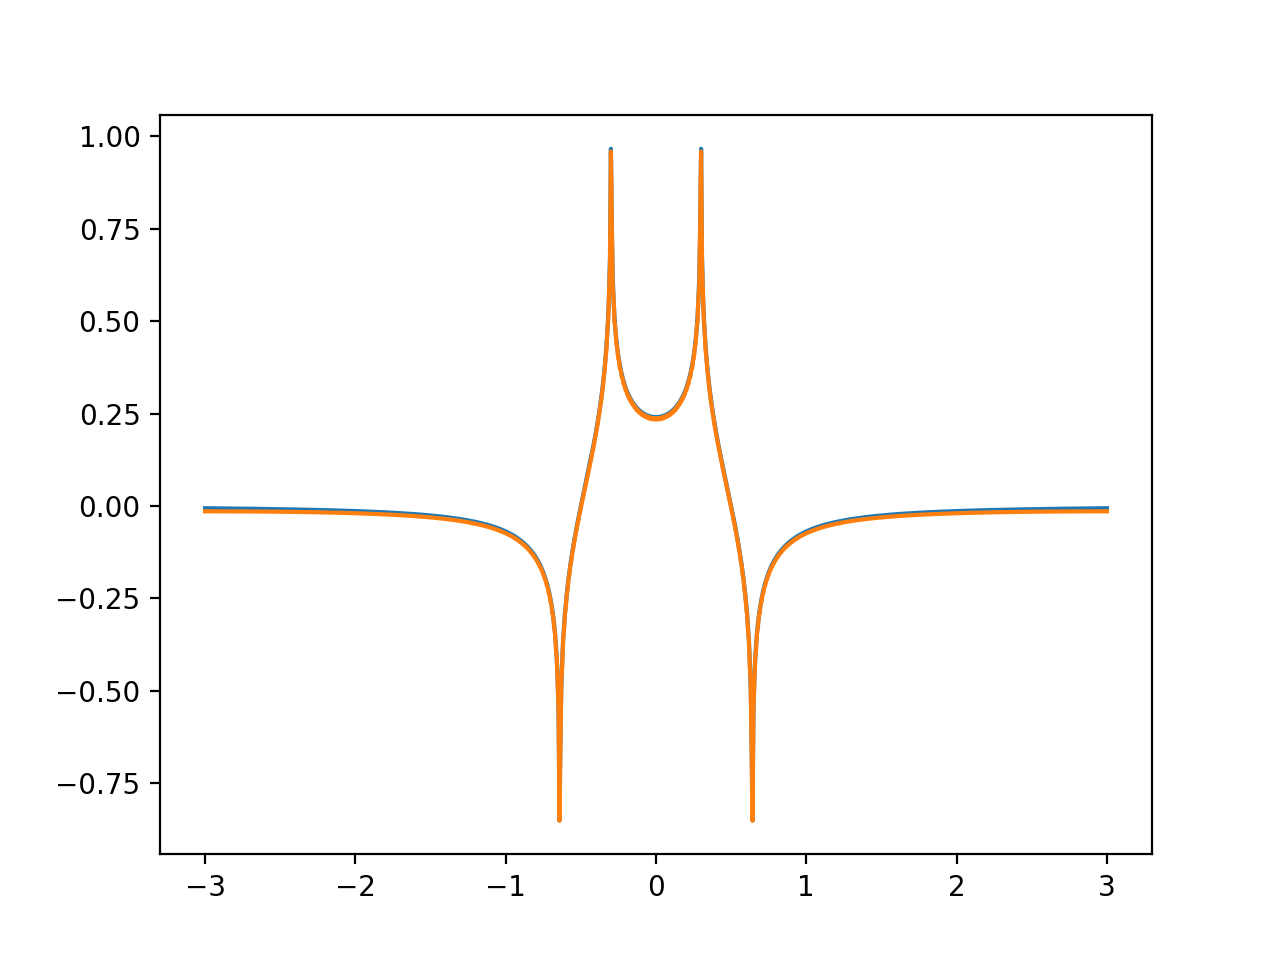

In [14]:
fig, ax = plt.subplots()
ax.plot(axis_t.centers, p_ramp)
ax.plot(axis_t.centers, p_ramp_ifft);